<!DOCTYPE html>
<html>
<body>
       <h1 style="text-align: center;font-size: 35px; font-weight: bold;">A Comprehensive Analysis of the Industrial-scale Penicillin Simulation  📊 </h1>
</body>
</html>


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">INTRODUCTION</span></p>
</div>

The Industrial-scale Penicillin Simulation Version model represents a significant leap in the field of industrial fermentation. It serves as an invaluable tool for the development of enhanced control strategies in industrial-scale fermentations. Moreover, it finds applications in research and educational pursuits, contributing to the study of monitoring, control, and optimization.

This dataset is a product of advanced mathematical simulations that emulate the operations of a 100,000-litre penicillin fermentation system, known as IndPenSim. By utilizing cutting-edge computational models, it provides insights into the complexities of large-scale biopharmaceutical production.

Citation : "The Development of an Industrial-Scale Fed-Batch Fermentation Simulation"

This paper was published in the Journal of Biotechnology, describes the development of a simulation of an industrial-scale fed-batch fermentation process. The simulation was developed using a mechanistic model and was validated using historical data collected from an industrial-scale penicillin fermentation process. The simulation can be used as a benchmark for process systems analysis and control studies.

Citation : "Modern day monitoring and control challenges outlined on an industrial-scale benchmark fermentation process"

This paper was published in Computers & Chemical Engineering, discusses about the challenges of monitoring and controlling an industrial-scale benchmark fermentation process. The authors identify several challenges, including the need for real-time monitoring of key process variables, the need for effective control strategies, and the need for robust and reliable sensors.


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">TABLE OF THE CONENTS</span></p>
</div>



1. Objective.
2. Data Understanding.
3. Identifying the Batch with Maximun Pencillin Concentarion.
4. Analysing the batch with highest penicillin concentration.
5. Summary
6. Conclusion.

<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">OBJECTIVE</span></p>
</div>


The objective of this analysis is to utilize the Industrial-scale Penicillin Simulation dataset to explore and enhance control strategies in industrial-scale fermentations. We aim to understand the interplay between input parameters and the resultant outcomes, identify the batch with the highest penicillin concentration, and investigate correlations between penicillin concentration and other variables. This study contributes to the advancement of bioprocess control and optimization in modern biopharmaceutical facilities.


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">DATA UNDERSTANDING</span></p>
</div>

Within this dataset, we encounter a wealth of information encapsulated in 113,935 rows, offering a comprehensive exploration of both inputs and outputs across a series of 100 distinct batches. Each batch is meticulously documented at various time intervals, creating a dynamic record of industrial processes and their evolution over time. This extensive dataset provides an invaluable opportunity to delve into the intricate interplay between input parameters and the resultant outcomes across a diverse spectrum of manufacturing scenarios.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/raviteja-padala/Industrial_Penicillin/main/indepensim%20inputs.jpg" /></div>



In [1]:
# Load required libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/big-databiopharmaceutical-manufacturing/Mendeley_data/100_Batches_IndPenSim_V3.csv
/kaggle/input/big-databiopharmaceutical-manufacturing/Mendeley_data/100_Batches_IndPenSim_Statistics.csv


In [2]:
#import dataset
dataset =  pd.read_csv('/kaggle/input/big-databiopharmaceutical-manufacturing/Mendeley_data/100_Batches_IndPenSim_V3.csv')

In [3]:
#shape of the dataset
dataset.shape

(113935, 2239)

In [4]:
#utilising data in 33 columns for EDA
df = dataset.iloc[:, :33]

In [5]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Time (h)                                                            113935 non-null  float64
 1   Aeration rate(Fg:L/h)                                               113935 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                               113935 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                             113935 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                              113935 non-null  float64
 5   Base flow rate(Fb:L/h)                                              113935 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                             113935 non-null  float64
 7   He


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">Identifying the Batch with Maximun Pencillin Concentarion</span></p>
</div>

- Identification of Batch Start and Batch End points

- Comparison of Batch End Results

- Finding the batch with Best Penicillin Concentration


In [6]:
#finding unique values in the variables
for i in df.columns:
    print(i, ":", df[i].nunique())
    print('-'*80)

Time (h) : 1450
--------------------------------------------------------------------------------
Aeration rate(Fg:L/h) : 7
--------------------------------------------------------------------------------
Agitator RPM(RPM:RPM) : 1
--------------------------------------------------------------------------------
Sugar feed rate(Fs:L/h) : 25
--------------------------------------------------------------------------------
Acid flow rate(Fa:L/h) : 1353
--------------------------------------------------------------------------------
Base flow rate(Fb:L/h) : 67206
--------------------------------------------------------------------------------
Heating/cooling water flow rate(Fc:L/h) : 77380
--------------------------------------------------------------------------------
Heating water flow rate(Fh:L/h) : 54534
--------------------------------------------------------------------------------
Water for injection/dilution(Fw:L/h) : 6
-----------------------------------------------------------------

In [7]:
# Find the indices of the batch start indices i.e., 0.2 time interval
batch_start_indices = df['Time (h)'].index[df['Time (h)'] == 0.2]

# Print the indices of the batch_start_indices
batch_start_indices

Index([     0,   1130,   2280,   3670,   4820,   5715,   6865,   8025,   9175,
        10435,  11585,  12595,  13745,  14825,  15975,  16880,  18030,  18970,
        20120,  21155,  22305,  23445,  24595,  25915,  27065,  28370,  29520,
        30575,  31725,  33175,  34325,  35575,  36725,  38025,  39175,  40155,
        41305,  42355,  43505,  44680,  45830,  47045,  48195,  49350,  50500,
        51810,  52960,  54100,  55250,  56410,  57560,  58685,  59835,  60800,
        61950,  63070,  64220,  65390,  66540,  67560,  68710,  69915,  71065,
        72215,  73365,  74520,  75670,  76505,  77655,  78780,  79930,  81000,
        82150,  83330,  84480,  85440,  86590,  87615,  88765,  89940,  91090,
        92190,  93340,  94545,  95695,  96695,  97845,  98955, 100105, 101260,
       102410, 103700, 104850, 105900, 107050, 108105, 109255, 110380, 111530,
       112785],
      dtype='int64')

In [8]:
def find_batch_end_indices(df):
    """Finds the indices of the rows in the DataFrame where the `Time (h)` column is equal to 0.2 time interval.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A Pandas Series containing the indices of the rows in the DataFrame where the `Time (h)` column is equal to 0.2.
  """
    # Find the indices where 'Time (h)' is equal to 0.2
    indices_0_2 = df[df['Time (h)'] == 0.2].index
    
    # Calculate the indices immediately before 0.2
    indices_before_0_2 = indices_0_2 - 1
    
    # Filter out negative indices (those before the start of the DataFrame)
    indices_before_0_2_filtered = indices_before_0_2[indices_before_0_2 > 0]
    
    # Create a mask for filtered indices greater than 0
    indices_before_0_2_filtered_mask = indices_before_0_2_filtered > 0
    
    # Return the filtered indices, which represent the batch end indices
    return indices_before_0_2_filtered[indices_before_0_2_filtered_mask]

# Call the function and copy the DataFrame
batch_end_indices = find_batch_end_indices(df.copy())

# Append the last index to represent the end of the final batch
batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))

# Print the indices of the batch_end_indices
print(batch_end_indices)

Index([  1129,   2279,   3669,   4819,   5714,   6864,   8024,   9174,  10434,
        11584,  12594,  13744,  14824,  15974,  16879,  18029,  18969,  20119,
        21154,  22304,  23444,  24594,  25914,  27064,  28369,  29519,  30574,
        31724,  33174,  34324,  35574,  36724,  38024,  39174,  40154,  41304,
        42354,  43504,  44679,  45829,  47044,  48194,  49349,  50499,  51809,
        52959,  54099,  55249,  56409,  57559,  58684,  59834,  60799,  61949,
        63069,  64219,  65389,  66539,  67559,  68709,  69914,  71064,  72214,
        73364,  74519,  75669,  76504,  77654,  78779,  79929,  80999,  82149,
        83329,  84479,  85439,  86589,  87614,  88764,  89939,  91089,  92189,
        93339,  94544,  95694,  96694,  97844,  98954, 100104, 101259, 102409,
       103699, 104849, 105899, 107049, 108104, 109254, 110379, 111529, 112784,
       113934],
      dtype='int64')


In [9]:
#reults of batches will be in the end indices 
results_df = df.iloc[batch_end_indices]
results_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
1129,226.0,65,100,80,0.000,200.3000,42.8750,1.2727,250,0.9,...,2023.4,1.27630,0.19061,29.3860,23.860,1.46690,0,74.573,0,0
2279,230.0,65,100,80,0.000,44.1360,1.8578,0.0001,250,0.9,...,2073.2,1.03340,0.19321,30.3920,20.873,1.25930,0,61.530,0,0
3669,278.0,60,100,80,0.000,24.4660,63.6390,444.2800,100,0.9,...,3476.8,0.55138,0.19809,17.5030,18.012,0.73368,0,75.530,0,0
4819,230.0,65,100,80,0.000,15.7810,75.7280,1.6785,250,0.9,...,3350.1,0.26071,0.20055,15.1890,17.502,0.97370,0,59.638,0,0
5714,179.0,75,100,80,0.000,63.6400,111.6700,14.9050,150,0.9,...,1818.6,1.37300,0.19166,28.0380,24.669,1.54670,0,77.112,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109254,230.0,65,100,80,0.000,14.7720,73.4010,10.5370,250,0.9,...,2950.6,0.54856,0.19773,21.2200,20.482,1.11860,0,67.908,0,0
110379,225.0,65,100,80,0.000,6.5491,57.7560,1.1040,250,0.9,...,3176.7,0.69632,0.19636,17.0520,20.729,1.15890,0,72.165,0,0
111529,230.0,65,100,80,0.000,60.4400,70.9450,11.0470,250,0.9,...,1962.0,0.89484,0.19443,32.8080,21.664,1.24770,0,66.590,0,0
112784,251.0,60,100,80,1.037,0.0000,281.7100,6.7026,0,0.9,...,4028.5,0.30526,0.20057,5.4819,13.774,0.66308,0,90.729,0,0


In [10]:
#descriptive statistics of batch end data of all batches
results_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),100.0,227.870000,1.815069e+01,167.000000,227.500000,230.000000,230.000000,290.00000
Aeration rate(Fg:L/h),100.0,65.350000,3.198406e+00,60.000000,65.000000,65.000000,65.000000,75.00000
Agitator RPM(RPM:RPM),100.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),100.0,81.800000,1.957271e+01,20.000000,80.000000,80.000000,80.000000,150.00000
Acid flow rate(Fa:L/h),100.0,0.155721,6.618278e-01,0.000000,0.000000,0.000000,0.000000,4.15080
Base flow rate(Fb:L/h),100.0,37.788269,3.775116e+01,0.000000,9.951425,29.927000,54.146750,200.30000
Heating/cooling water flow rate(Fc:L/h),100.0,47.035829,4.475456e+01,0.000100,14.768500,32.771500,68.589250,281.71000
Heating water flow rate(Fh:L/h),100.0,42.467140,6.897390e+01,0.000100,1.612250,9.296450,67.956750,444.28000
Water for injection/dilution(Fw:L/h),100.0,224.000000,7.159087e+01,0.000000,250.000000,250.000000,250.000000,400.00000
Air head pressure(pressure:bar),100.0,0.900000,4.463264e-16,0.900000,0.900000,0.900000,0.900000,0.90000


<span style="color: blue;">**Observation:**</span>

1. **Time (h):** The time intervals range from 167 hours to 290 hours, with an average time of approximately 227.87 hours.

2. **Aeration rate (Fg:L/h):** The aeration rate ranges from 60 to 75 L/h, with an average rate of approximately 65.35 L/h.

3. **Agitator RPM (RPM:RPM):** The agitator RPM is constant at 100 RPM for all batches.

4. **Sugar feed rate (Fs:L/h):** The sugar feed rate varies from 20 to 150 L/h, with an average rate of approximately 81.80 L/h.

5. **Acid flow rate (Fa:L/h):** The acid flow rate ranges from 0 to 4.15 L/h, with an average rate of approximately 0.16 L/h.

6. **Base flow rate (Fb:L/h):** The base flow rate varies from 0 to 200.30 L/h, with an average rate of approximately 37.79 L/h.

7. **Heating/Cooling Water Flow Rate (Fc:L/h):** The heating/cooling water flow rate ranges from 0.0001 to 281.71 L/h, with an average rate of approximately 47.04 L/h.

8. **Heating Water Flow Rate (Fh:L/h):** The heating water flow rate varies from 0.0001 to 444.28 L/h, with an average rate of approximately 42.47 L/h.

9. **Water for Injection/Dilution (Fw:L/h):** The water for injection/dilution ranges from 0 to 400 L/h, with an average rate of 224 L/h.

10. **Air Head Pressure (pressure:bar):** The air head pressure is constant at 0.9 bar for all batches.

11. **Dumped Broth Flow (Fremoved:L/h):** The dumped broth flow ranges from -4000 to 0 L/h, with an average of -400 L/h.

12. **Substrate Concentration (S:g/L):** The substrate concentration varies from 0.0011 to 115.27 g/L, with an average of approximately 19.39 g/L.

13. **Dissolved Oxygen Concentration (DO2:mg/L):** The dissolved oxygen concentration ranges from 8.87 to 14.77 mg/L, with an average of approximately 12.72 mg/L.

14. **Penicillin Concentration (P:g/L):** The penicillin concentration varies from 3.16 to 36.16 g/L, with an average of approximately 24.01 g/L.

15. **Vessel Volume (V:L):** The vessel volume ranges from 60331 to 89990 liters, with an average of approximately 76053.54 liters.

16. **Vessel Weight (Wt:Kg):** The vessel weight varies from 68469 to 99491 kg, with an average of approximately 84995.10 kg.

17. **pH (pH:pH):** The pH values range from 6.47 to 6.68, with an average pH of approximately 6.51.

18. **Temperature (T:K):** The temperature ranges from 297.43 to 298.99 K, with an average of approximately 297.97 K.

19. **Generated Heat (Q:kJ):** The generated heat varies from 4.03 to 833.80 kJ, with an average of approximately 257.78 kJ.

20. **Carbon Dioxide Percent in Off-Gas (CO2outgas:%):** The carbon dioxide percentage in off-gas ranges from 0.64% to 2.06%, with an average of approximately 1.45%.

21. **PAA Flow (Fpaa:L/h):** The PAA flow ranges from 3.66 to 15 L/h, with an average of approximately 6.58 L/h.

22. **PAA Concentration Offline (PAA_offline:PAA (g L^{-1})):** The PAA concentration varies from 393.1 to 11524 g/L, with an average of approximately 3358.13 g/L.

23. **Oil Flow (Foil:L/hr):** The oil flow is constant at 23 L/hr for all batches.

24. **NH3 Concentration Off-line (NH3_offline:NH3 (g L^{-1})):** The NH3 concentration ranges from 1590.6 to 5170 g/L, with an average of approximately 2571.96 g/L.

25. **Oxygen Uptake Rate (OUR:(g min^{-1})):** The oxygen uptake rate varies from 0.0447 to 1.7044 g/min, with an average of approximately 0.94 g/min.

26. **Oxygen in Percent in Off-Gas (O2:O2 (%)):** The oxygen percentage in off-gas ranges from 0.1863% to 0.2035%, with an average of approximately

 0.1942%.

27. **Offline Penicillin Concentration (P_offline:P(g L^{-1})):** The offline penicillin concentration varies from 3.17 to 36.18 g/L, with an average of approximately 24.03 g/L.

28. **Offline Biomass Concentration (X_offline:X(g L^{-1})):** The offline biomass concentration ranges from 10.76 to 25.27 g/L, with an average of approximately 20.80 g/L.

29. **Carbon Evolution Rate (CER:g/h):** The carbon evolution rate varies from 0.49 to 1.71 g/h, with an average of approximately 1.21 g/h.

30. **Ammonia Shots (NH3_shots:kgs):** The ammonia shots are constant at 0 kgs for all batches.

31. **Viscosity (Viscosity_offline:centPoise):** The viscosity ranges from 53.75 to 117.93 centipoise, with an average of approximately 71.06 centipoise.

32. **Fault Reference (Fault_ref:Fault ref):** The fault reference indicates two values, 0 and 1, with an average of 0.01, suggesting occasional faults.

33. **0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref):** The control reference indicates two values, 0 and 1, suggesting a mix of recipe-driven and operator-controlled batches.


The dataset's maximum **Offline Penicillin Concentration (P_offline:P(g L^{-1}))** reaching 36.18 g/L indicates a significant achievement in the batch process. To gain deeper insights, we will conduct an in-depth analysis of the control parameters and conditions that contributed to this exceptional output. Understanding the factors that led to such high penicillin concentration is crucial for process optimization and quality improvement in industrial-scale fermentations.

## Finding batch with highest pencillin concentration

In [11]:
# Create an empty list to store batch-wise indices
batch_indices = []

# Initialize variables to track the start and end of a batch
batch_start = batch_start_indices[0]
for batch_end in batch_end_indices:
    # Append the indices for the current batch to the list
    batch_indices.append((batch_start, batch_end))
    # Update the start of the next batch
    batch_start = batch_end + 1

# Find the batch where 'Offline Penicillin concentration (P_offline:P(g L^{-1}))' is 36.18 maximum
target_concentration = 36.18
target_batch = None

for i, (start, end) in enumerate(batch_indices):
    batch_data = df[start:end+1]
    if target_concentration in batch_data['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].values:
        target_batch = i + 1  # Batch numbers start from 1

print(f'Batch with Offline Penicillin concentration {target_concentration} is Batch {target_batch}')

Batch with Offline Penicillin concentration 36.18 is Batch 29


In [12]:
# Find the start and end indices of Batch 29
batch_number = 29

if 1 <= batch_number <= len(batch_indices):
    batch_29_start, batch_29_end = batch_indices[batch_number - 1]
    print(f"Start Index of Batch 29: {batch_29_start}")
    print(f"End Index of Batch 29: {batch_29_end}")
else:
    print("Batch 29 is out of range.")

Start Index of Batch 29: 31725
End Index of Batch 29: 33174


In [13]:
batch_29_df = df.loc[31725:33174]
batch_29_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
31725,0.2,30,100,8,0.00000,29.501,0.0001,224.11000,0,0.6,...,NaN,1.027400,0.18538,NaN,NaN,0.035263,0,NaN,0,0
31726,0.4,30,100,8,0.00000,50.489,0.0001,64.56800,0,0.6,...,NaN,0.210780,0.20103,NaN,NaN,0.039935,0,NaN,0,0
31727,0.6,30,100,8,0.00000,55.430,0.0001,0.00010,0,0.6,...,NaN,0.016882,0.20465,NaN,NaN,0.041510,0,NaN,0,0
31728,0.8,30,100,8,0.00000,41.187,0.0001,82.77800,0,0.6,...,NaN,-0.017887,0.20529,NaN,NaN,0.042484,0,NaN,0,0
31729,1.0,30,100,8,0.51791,20.593,92.8010,8.27780,0,0.6,...,1720.2,-0.016022,0.20525,0.001,0.56066,0.043367,0,4.0847,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33170,289.2,60,100,80,0.00000,45.155,51.1560,6.19280,100,0.9,...,NaN,1.394300,0.18925,NaN,NaN,1.081200,0,NaN,0,0
33171,289.4,60,100,80,0.00000,43.360,15.3470,121.06000,100,0.9,...,NaN,1.409300,0.18911,NaN,NaN,1.081900,0,NaN,0,0
33172,289.6,60,100,80,0.00000,43.013,111.3600,12.10600,100,0.9,...,NaN,1.414000,0.18906,NaN,NaN,1.082700,0,NaN,0,0
33173,289.8,60,100,80,0.00000,44.094,67.5700,1.21060,100,0.9,...,NaN,1.408400,0.18911,NaN,NaN,1.083500,0,NaN,0,0


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">Analysing the batch with highest penicillin concentration</span></p>
</div>


In [14]:
batch_29_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),1450.0,145.100000,83.744652,0.200000,72.650000,145.100000,217.550000,290.00000
Aeration rate(Fg:L/h),1450.0,64.634483,10.402403,30.000000,60.000000,65.000000,75.000000,75.00000
Agitator RPM(RPM:RPM),1450.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),1450.0,77.293103,21.193844,8.000000,80.000000,80.000000,90.000000,150.00000
Acid flow rate(Fa:L/h),1450.0,0.008239,0.099012,0.000000,0.000000,0.000000,0.000000,2.07920
Base flow rate(Fb:L/h),1450.0,47.760901,24.470514,0.000000,37.301250,45.509000,55.909250,225.00000
Heating/cooling water flow rate(Fc:L/h),1450.0,86.049191,119.428583,0.000100,15.314750,37.425500,96.648500,674.12000
Heating water flow rate(Fh:L/h),1450.0,21.358063,45.536185,0.000100,0.000100,0.995770,12.808750,461.82000
Water for injection/dilution(Fw:L/h),1450.0,148.275862,146.551549,0.000000,0.000000,100.000000,250.000000,500.00000
Air head pressure(pressure:bar),1450.0,0.935379,0.120486,0.600000,0.900000,0.900000,1.000000,1.10000


## Distribution of variables

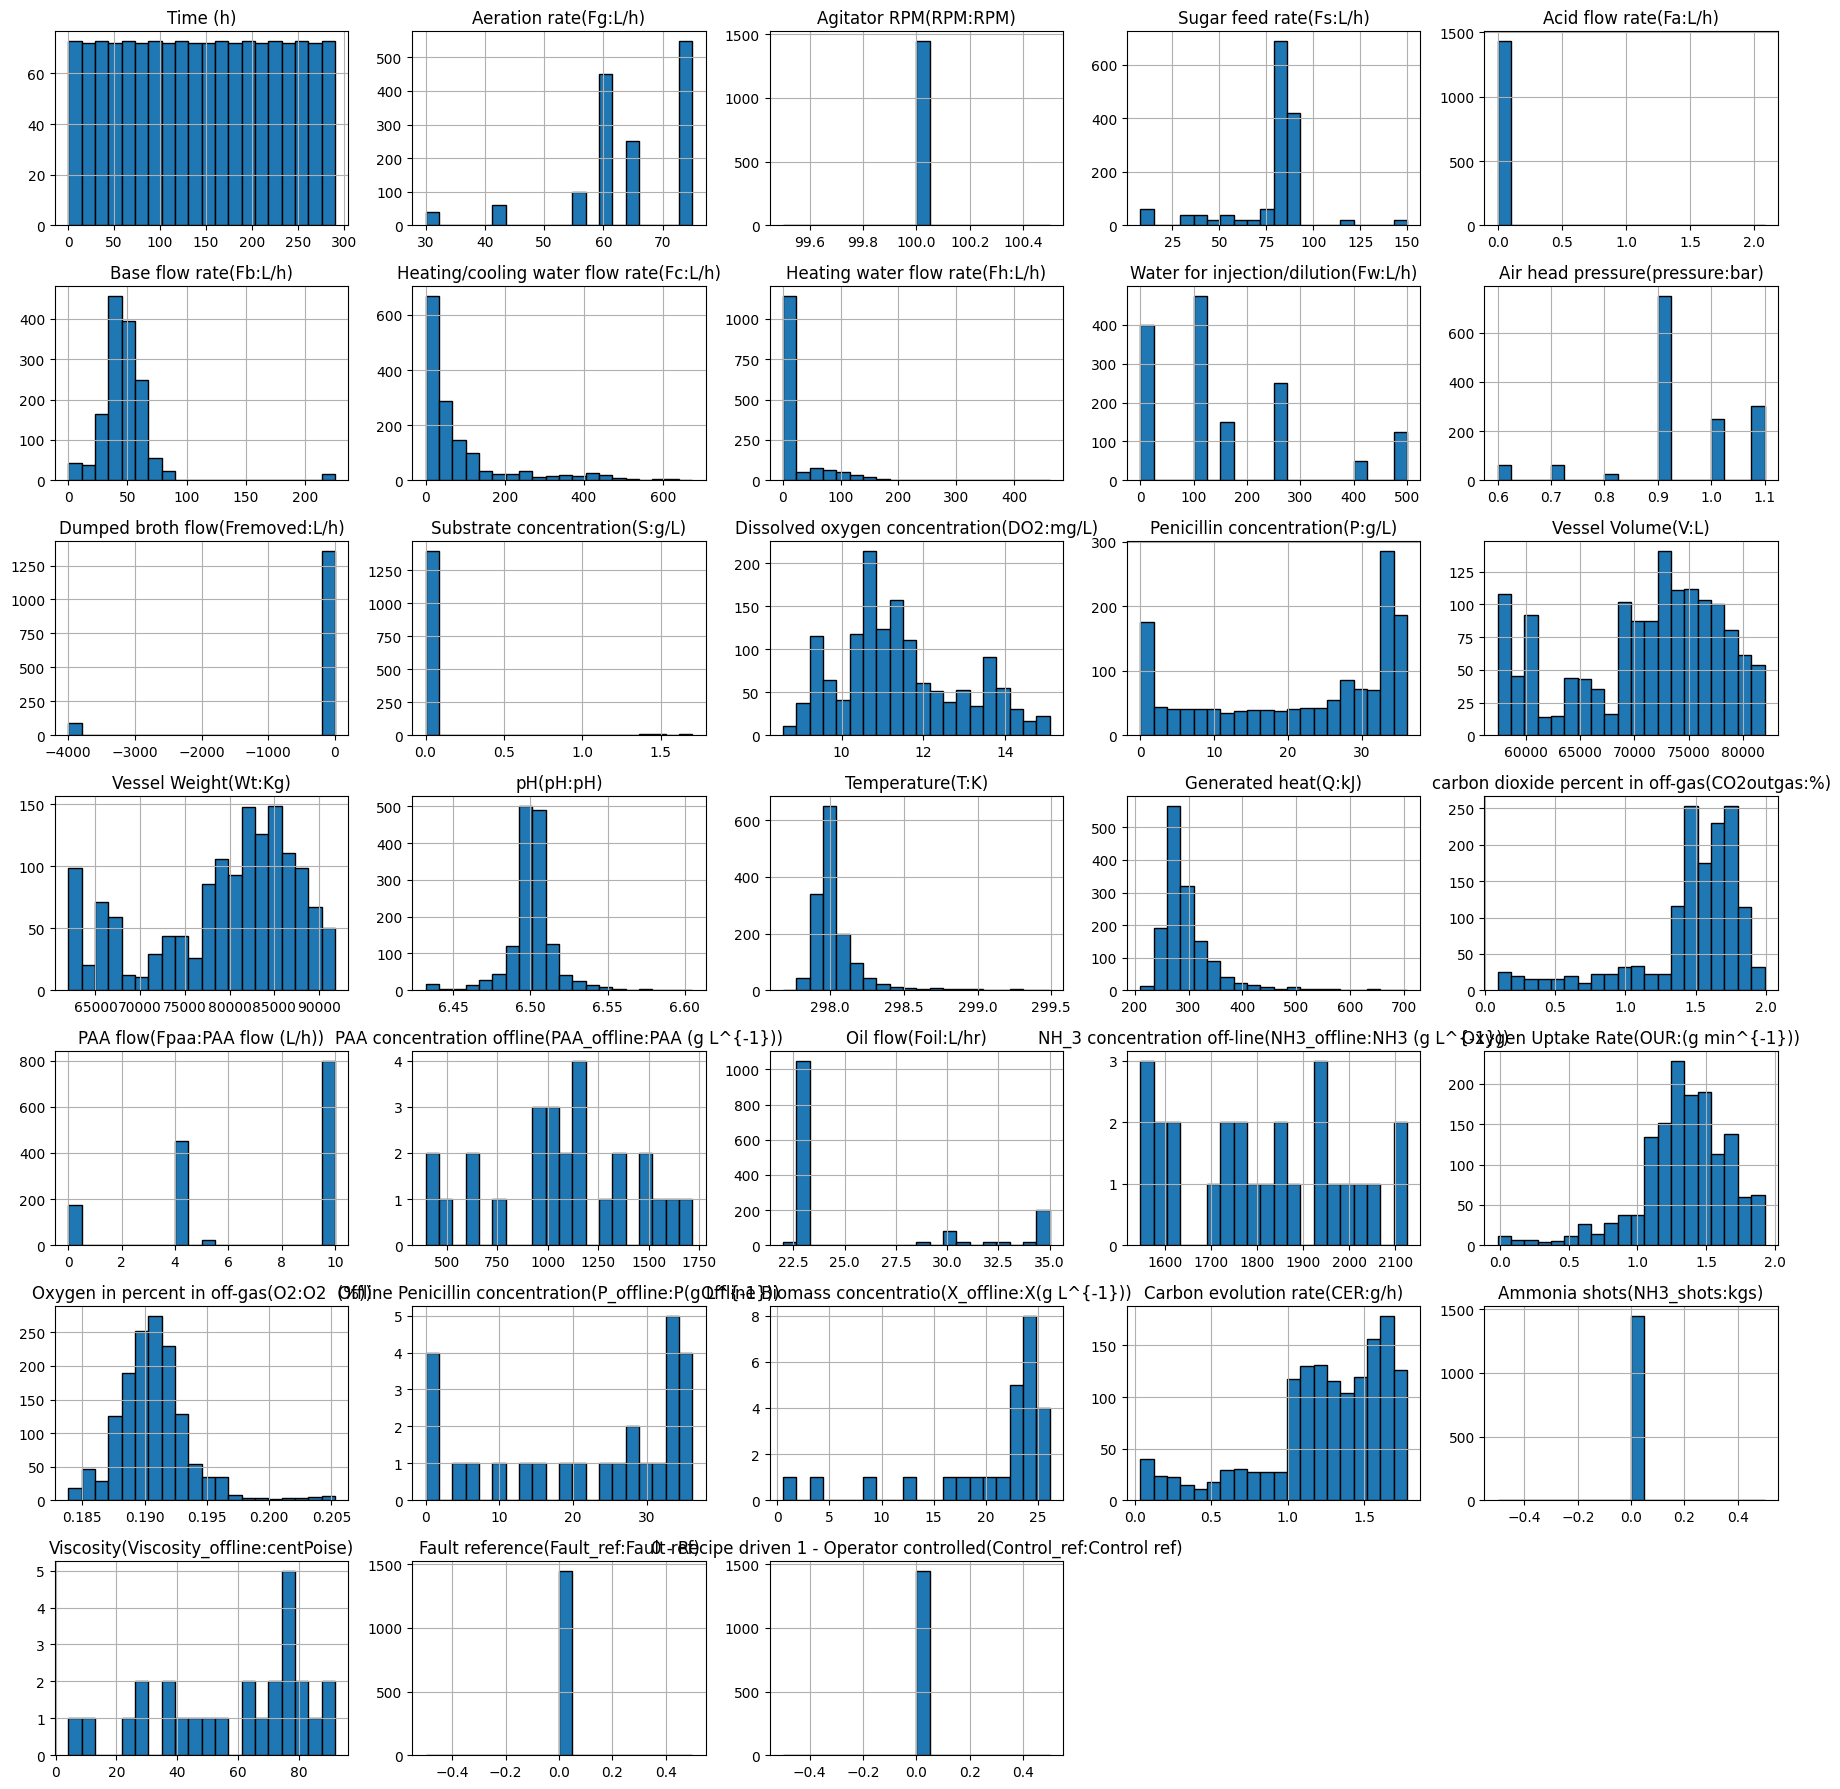

In [15]:
# Create a 6x6 grid of subplots
fig, axes = plt.subplots(7, 5, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each variable in batch_29_df
for i, var in enumerate(batch_29_df.columns):
    ax = axes[i]
    ax.hist(batch_29_df[var], bins=20, edgecolor='k')
    ax.set_title(var)
    ax.grid(True)

# Remove empty subplots
for i in range(len(batch_29_df.columns), 35):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<span style = "color:blue">**Observation**</span>

Based on the distributions for the variables in the data, here are some observations and insights:

- **Time (h):** The average time is approximately 145 hours, with a standard deviation of around 83.74 hours. The minimum time is 0.2 hours and the maximum is 290 hours. The median time is also 145.1 hours, indicating a symmetric distribution.

- **Aeration rate (Fg:L/h):** The average aeration rate is around 64.63 L/h with a standard deviation of 10.4 L/h. The minimum and maximum aeration rates are 30 L/h and 75 L/h respectively. The median aeration rate is 65 L/h.

- **Agitator RPM (RPM:RPM):** The agitator RPM is constant at 100 RPM throughout the batch production.

- **Sugar feed rate (Fs:L/h):** Sugar feed rates exhibit a normal distribution, with a mean of 77.29 L/h and a standard deviation of 21.19 L/h, indicating some variability in sugar feed.

- **Acid flow rate (Fa:L/h):** The acid flow rate is highly skewed to the right, with a mean of 0.0082 L/h and a standard deviation of 0.0990 L/h. This suggests that most of the time, the acid flow rate is very low, but there are occasional high outliers.

- **Base flow rate (Fb:L/h):** Base flow rates follow a normal distribution, with a mean of 47.76 L/h and a standard deviation of 24.47 L/h, indicating moderate variability.

- **Heating/cooling water flow rate (Fc:L/h):** The flow rate of heating/cooling water is skewed to the right, with a mean of 86.04 L/h and a standard deviation of 119.43 L/h, suggesting occasional high flow rates.

- **Heating water flow rate (Fh:L/h):** Heating water flow rates also exhibit right-skewness, with a mean of 21.36 L/h and a standard deviation of 45.54 L/h, indicating occasional high values.

- **Water for injection/dilution (Fw:L/h):** The flow rate for water injection/dilution is skewed to the right, with a mean of 148.28 L/h and a standard deviation of 146.55 L/h, suggesting occasional high flow rates.

- **Air head pressure (pressure:bar):**  Air head pressure varies from 0.6 to 1.1 bar, with an average of approximately 0.94 bar.

- **Dumped broth flow (Fremoved:L/h):** The dumped broth flow is skewed to the left, with a mean of -248.28 L/h and a standard deviation of 965.46 L/h. This indicates that most of the time, the flow is zero, but there are occasional negative values.

- **Substrate concentration (S:g/L):** Substrate concentrations are right-skewed, with a mean of 0.049 g/L and a standard deviation of 0.253 g/L, suggesting occasional high concentrations.

- **Dissolved oxygen concentration (DO2:mg/L):** Dissolved oxygen concentrations are normally distributed, with a mean of 11.42 mg/L and a standard deviation of 1.49 mg/L, indicating relatively consistent oxygen levels.

- **Penicillin concentration (P:g/L):**  Penicillin concentrations vary widely, from 0.0009 g/L to 36.183 g/L, with an average of approximately 21.84 g/L.

- **Vessel Volume (V:L):** Vessel volume is normally distributed, with a mean of 70,940.77 L and a standard deviation of 6,902.15 L, indicating consistent volume levels.

- **Vessel Weight (Wt:Kg):** Vessel weight follows a normal distribution, with a mean of 79,315.91 kg and a standard deviation of 8,191.75 kg, suggesting relatively stable weight values.

- **pH (pH:pH):** pH values are normally distributed, with a mean of 6.50 and a standard deviation of 0.02, indicating that pH levels are fairly consistent.

- **Temperature (T:K):** Temperature data follows a normal distribution, with a mean of 298.03 K and a standard deviation of 0.18 K, suggesting relatively stable temperature conditions.

- **Generated heat (Q:kJ):** Generated heat is right-skewed, with a mean of 296.94 kJ and a standard deviation of 53.53 kJ, indicating occasional high values.

- **carbon dioxide percent in off-gas (CO2outgas:%):** Carbon dioxide percent in the off-gas follows a normal distribution, with a mean of 1.46% and a standard deviation of 0.40%, indicating relatively stable levels.

- **PAA flow (Fpaa:PAA flow (L/h)):** PAA flow with a mean of 6.84 L/h and a standard deviation of 3.70 L/h, indicating consistent flow rates.

- **PAA concentration offline (PAA_offline:PAA (g L^{-1})):** The PAA concentration offline with a mean of 1080.52 g/L and a standard deviation of 360.31 g/L, suggesting occasional lower concentrations.

- **Oil flow (Foil:L/hr):** Oil flow with a mean of 25.63 L/hr and a standard deviation of 4.60 L/hr, indicating relatively stable flow rates.

- **NH_3 concentration off-line (NH3_offline:NH3 (g L^{-1})):** NH_3 concentration offline with a mean of 1808.82 g/L and a standard deviation of 177.11 g/L, suggesting occasional lower concentrations.

- **Oxygen Uptake Rate (OUR:(g min^{-1})):** Oxygen uptake rates are normally distributed, with a mean of 1.34 g/min and a standard deviation of 0.33 g/min, indicating consistent oxygen uptake.

- **Oxygen in percent in off-gas (O2:O2 (%)):** Oxygen percentages in the off-gas are normally distributed, with a mean of 0.19% and a standard deviation of 0.003%, indicating relatively stable oxygen levels.

- **Offline Penicillin concentration (P_offline:P(g L^{-1})):** The offline penicillin concentration is  with a mean of 22.05 g/L and a standard deviation of 13.36 g/L, suggesting occasional lower concentrations.

- **Offline Biomass concentration (X_offline:X(g L^{-1})):** Offline biomass concentration  with a mean of 20.54 g/L and a standard deviation of 6.84 g/L, indicating consistent levels.

- **Carbon evolution rate (CER:g/h):** Carbon evolution rates with a mean of 1.25 g/h and a standard deviation of 0.42 g/h, suggesting consistent carbon evolution.

- **Ammonia shots (NH3_shots:kgs):** Ammonia shots are constant, with a mean and standard deviation of 0, indicating no variation.

- **Viscosity (Viscosity_offline:centPoise):** Viscosity is left-skewed, with a mean of 57.80 centPoise and a standard deviation of 25.36 centPoise, suggesting occasional higher viscosity values.

- **Fault reference (Fault_ref:Fault ref):** Fault reference is constant, with a mean and standard deviation of 0, indicating no variation.

- **0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref):** The variable value is 0, indicating that this batch is recipe driven.


##  Observation on Penicillin Concentration 

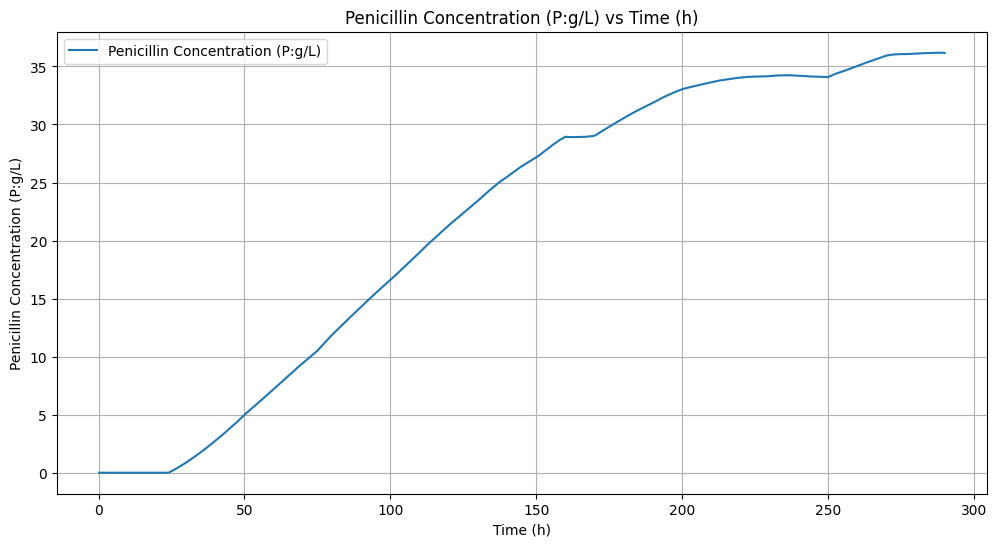

In [16]:
# Plot the Penicillin Concentration (P:g/L) for Batch 29
plt.figure(figsize=(12, 6))
plt.plot(batch_29_df['Time (h)'], batch_29_df['Penicillin concentration(P:g/L)'], label='Penicillin Concentration (P:g/L)')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin Concentration (P:g/L)')
plt.title('Penicillin Concentration (P:g/L) vs Time (h)')
plt.legend()
plt.grid(True)
plt.show()


<span style="color: blue;">**Observation:**</span>

During the batch production process, a noteworthy trend in the penicillin concentration was observed. The concentration exhibited a rapid and exponential increase between the time points of 25 hours and 200 hours. Following this initial exponential growth phase, there was a noticeable transition to a slower rate of increase in penicillin concentration as the production continued. This shift in concentration dynamics may indicate different phases or factors influencing the penicillin production process. Further analysis and investigation would be valuable to understand the underlying factors contributing to these concentration changes.


## Separating variables into categorical and continous based on their observations for better analysis

In [17]:
categorical_features = []
mid_categories = []
continous_features = []

for feature in batch_29_df:
    unique_count = len(batch_29_df[feature].unique())
    
    if unique_count <= 10:
        categorical_features.append(feature)
    elif 10 < unique_count < 30:
        mid_categories.append(feature)
    else:
        continous_features.append(feature)

In [18]:
#categorical features
# Initialize a counter
count = 1

# Print categorical features with numbering
for feature in categorical_features:
    print(f"{count}. {feature} : {batch_29_df[feature].unique()}")
    print("-" * 70)
    # Increment the counter
    count += 1

1. Aeration rate(Fg:L/h) : [30 42 55 60 75 65]
----------------------------------------------------------------------
2. Agitator RPM(RPM:RPM) : [100]
----------------------------------------------------------------------
3. Water for injection/dilution(Fw:L/h) : [  0 500 100 400 150 250]
----------------------------------------------------------------------
4. Air head pressure(pressure:bar) : [0.6 0.7 0.8 0.9 1.1 1. ]
----------------------------------------------------------------------
5. Dumped broth flow(Fremoved:L/h) : [    0 -4000]
----------------------------------------------------------------------
6. PAA flow(Fpaa:PAA flow (L/h)) : [ 5.  0. 10.  4.]
----------------------------------------------------------------------
7. Oil flow(Foil:L/hr) : [22 30 35 34 33 32 31 29 23]
----------------------------------------------------------------------
8. Ammonia shots(NH3_shots:kgs) : [0]
----------------------------------------------------------------------
9. Fault reference(Fault_

In [19]:
# mid_categories features
# Initialize a counter
count = 1

# Print mid_categories features with numbering
for feature in mid_categories:
    print(f"{count}. {feature} : {batch_29_df[feature].nunique()}")
    print("-" * 70)
    # Increment the counter
    count += 1

1. Sugar feed rate(Fs:L/h) : 18
----------------------------------------------------------------------
2. Acid flow rate(Fa:L/h) : 14
----------------------------------------------------------------------
3. PAA concentration offline(PAA_offline:PAA (g L^{-1})) : 26
----------------------------------------------------------------------
4. NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})) : 26
----------------------------------------------------------------------
5. Offline Penicillin concentration(P_offline:P(g L^{-1})) : 26
----------------------------------------------------------------------
6. Offline Biomass concentratio(X_offline:X(g L^{-1})) : 26
----------------------------------------------------------------------
7. Viscosity(Viscosity_offline:centPoise) : 26
----------------------------------------------------------------------


In [20]:
# continous_features
# Initialize a counter
count = 1

# Print ccontinous_features with numbering
for feature in continous_features:
    print(f"{count}. {feature} : {batch_29_df[feature].nunique()}")
    print("-" * 70)
    # Increment the counter
    count += 1

1. Time (h) : 1450
----------------------------------------------------------------------
2. Base flow rate(Fb:L/h) : 1412
----------------------------------------------------------------------
3. Heating/cooling water flow rate(Fc:L/h) : 1426
----------------------------------------------------------------------
4. Heating water flow rate(Fh:L/h) : 902
----------------------------------------------------------------------
5. Substrate concentration(S:g/L) : 1401
----------------------------------------------------------------------
6. Dissolved oxygen concentration(DO2:mg/L) : 1237
----------------------------------------------------------------------
7. Penicillin concentration(P:g/L) : 1370
----------------------------------------------------------------------
8. Vessel Volume(V:L) : 1415
----------------------------------------------------------------------
9. Vessel Weight(Wt:Kg) : 1413
----------------------------------------------------------------------
10. pH(pH:pH) : 476
----

In [21]:
# Print categorical features with numbering
for feature in categorical_features:
    print(f"{batch_29_df[feature].value_counts()}")
    print("-" * 70)

Aeration rate(Fg:L/h)
75    550
60    450
65    250
55    100
42     60
30     40
Name: count, dtype: int64
----------------------------------------------------------------------
Agitator RPM(RPM:RPM)
100    1450
Name: count, dtype: int64
----------------------------------------------------------------------
Water for injection/dilution(Fw:L/h)
100    475
0      400
250    250
150    150
500    125
400     50
Name: count, dtype: int64
----------------------------------------------------------------------
Air head pressure(pressure:bar)
0.9    750
1.1    300
1.0    250
0.7     63
0.6     62
0.8     25
Name: count, dtype: int64
----------------------------------------------------------------------
Dumped broth flow(Fremoved:L/h)
 0       1360
-4000      90
Name: count, dtype: int64
----------------------------------------------------------------------
PAA flow(Fpaa:PAA flow (L/h))
10.0    800
4.0     450
0.0     175
5.0      25
Name: count, dtype: int64
----------------------------------

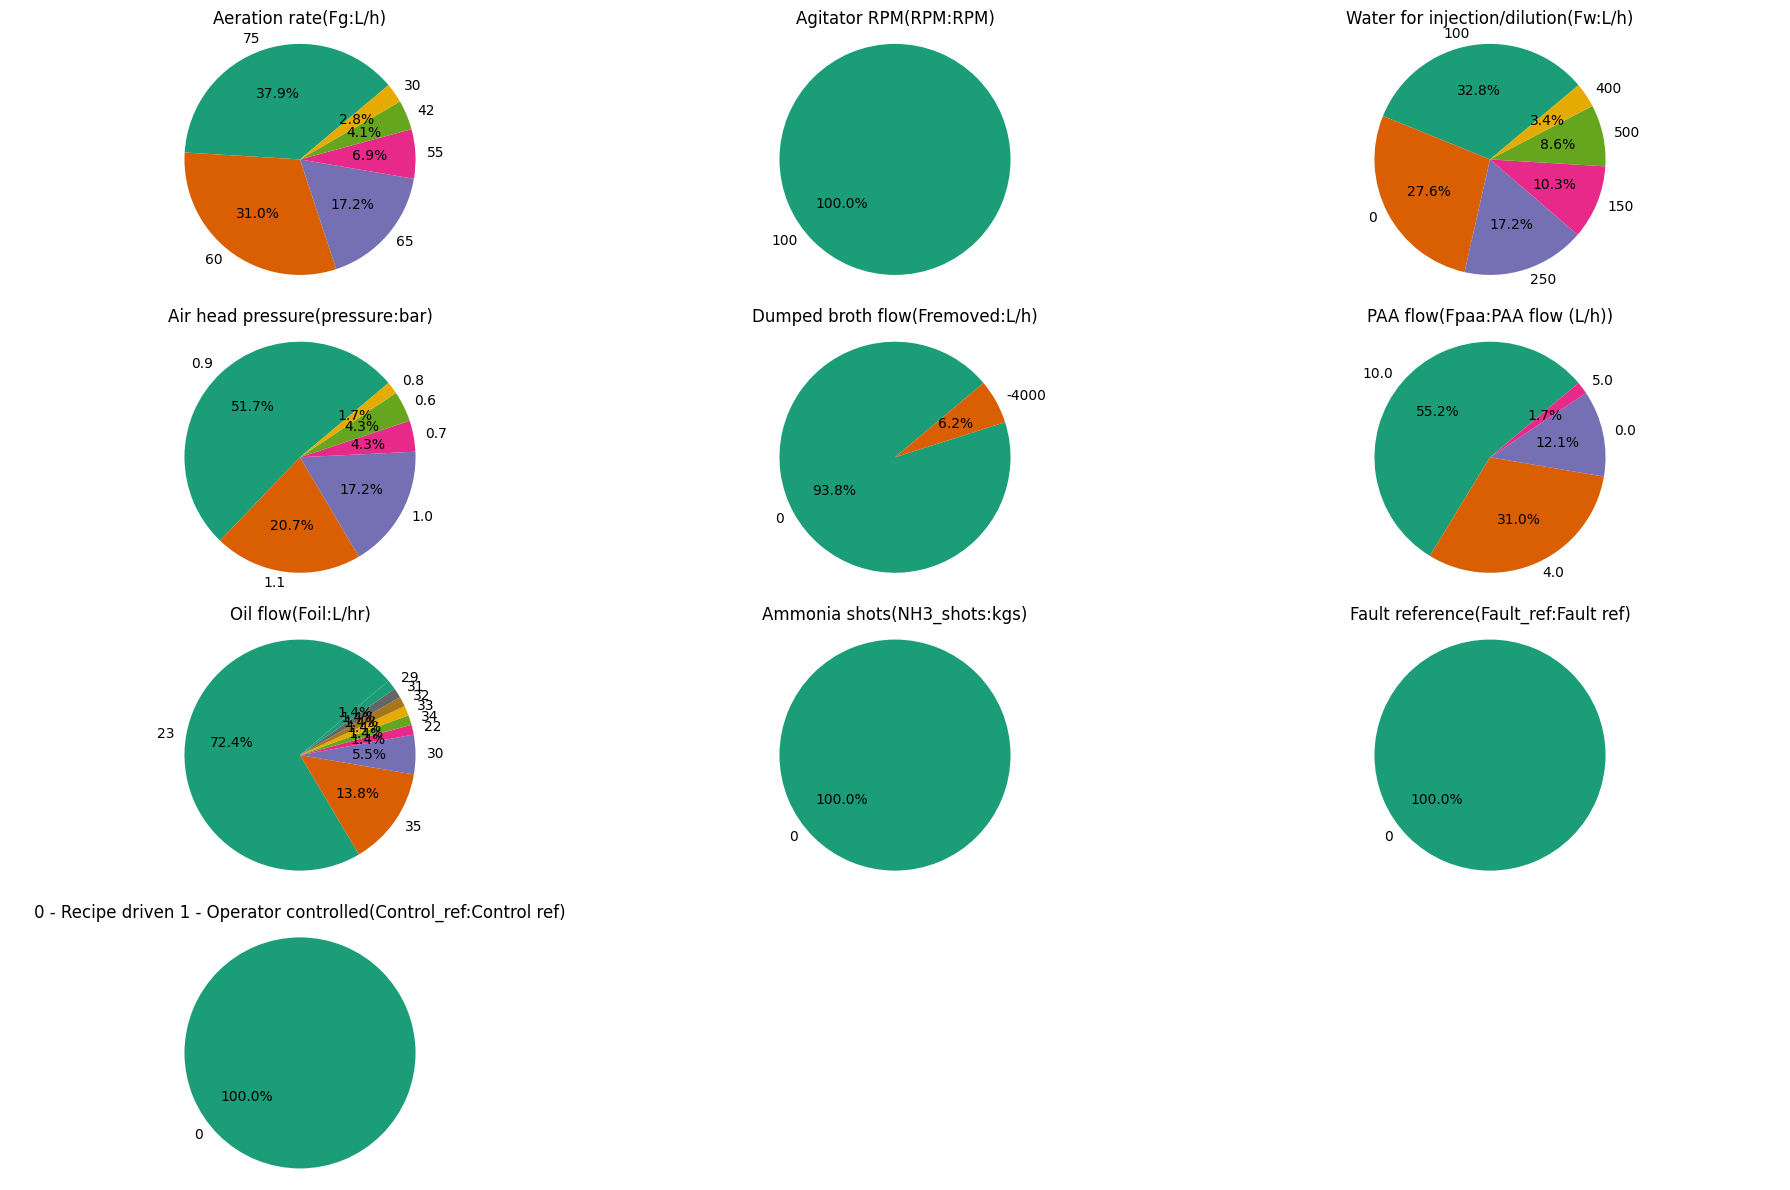

In [22]:
# value counts percentages in categorical features
mpl_palette_name = 'Dark2'

# Increase the figure size
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features):
    # Adjust the subplot layout for better readability
    plt.subplot(4, 3, i + 1)

    bars = batch_29_df[feature].value_counts()
    colors = sns.palettes.mpl_palette(mpl_palette_name, len(bars))

    plt.pie(bars.values, labels=bars.index, colors=colors, autopct='%1.1f%%', startangle=40)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

    plt.title("{}".format(feature))

plt.tight_layout()
plt.show()


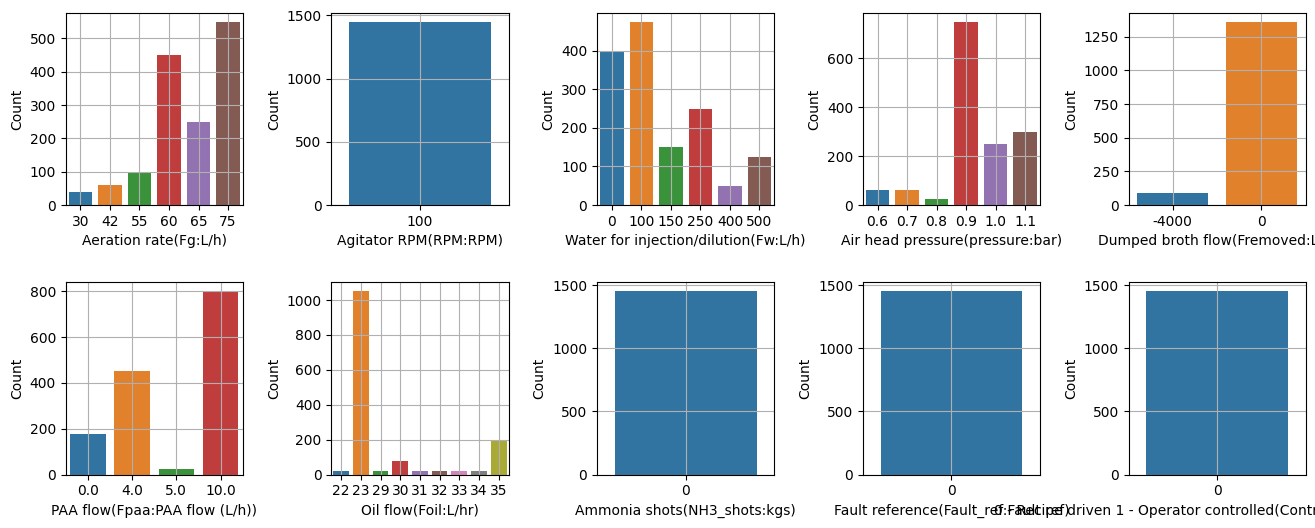

In [23]:
# Create a 5x5 grid of subplots with improved spacing
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot countplots for each variable in batch_29_df
for i, var in enumerate(categorical_features):
    # Create subplots
    ax = axes[i]

    # Plot the countplot for the categorical variable
    sns.countplot(data=batch_29_df, x=var, ax=ax)
    ax.grid(True)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")

# Hide any remaining empty subplots
for i in range(len(categorical_features), len(axes)):
    axes[i].axis('off')

plt.show()

<span style= "color:blue">**Observation**</span>

Based on the categorical features and their value counts, here are the observations:

- **Aeration rate (Fg:L/h):** Aeration rates vary, with 75 L/h being the most common (550 occurrences), followed by 60 L/h (450 occurrences), 65 L/h (250 occurrences), and others. This suggests that multiple aeration rates are used in the batch production process.

- **Agitator RPM (RPM:RPM):** The agitator RPM is consistently maintained at 100 RPM for all observations (1450 occurrences), indicating a fixed agitator speed throughout the batch production.

- **Water for injection/dilution (Fw:L/h):** Water for injection or dilution varies in flow rate, with 100 L/h being the most common (475 occurrences). Some observations have no water injection (0 L/h), while other flow rates such as 250 L/h, 150 L/h, and 500 L/h are also used. This suggests different water injection rates based on the production process.

- **Air head pressure (pressure:bar):** Air head pressure varies between 0.6 bar, 0.7 bar, 0.8 bar, 0.9 bar, 1.0 bar, and 1.1 bar. The most common air head pressure is 0.9 bar (750 occurrences), indicating that this pressure level is frequently used during production.

- **Dumped broth flow (Fremoved:L/h):** Most observations (1360 occurrences) have no dumped broth flow (0 L/h), but there are instances where a large volume of broth is dumped at -4000 L/h (90 occurrences). This suggests that there are rare cases of substantial broth disposal.

- **PAA flow (Fpaa:PAA flow (L/h)):** PAA flow rates vary, with 10.0 L/h being the most common (800 occurrences), followed by 4.0 L/h (450 occurrences). Some observations have no PAA flow (0 L/h), and there are a few instances of 5.0 L/h (25 occurrences). This indicates variability in PAA flow rates during production.

- **Oil flow (Foil:L/hr):** Oil flow rates vary, with 23 L/hr being the most common (1050 occurrences). Other flow rates, such as 35 L/hr, 30 L/hr, and 22 L/hr, are also used. This suggests different oil flow rates based on the production process.

- **Ammonia shots (NH3_shots:kgs):** All observations (1450 occurrences) have zero ammonia shots, indicating that no ammonia shots were recorded during the batch production.

- **Fault reference (Fault_ref:Fault ref):** All observations (1450 occurrences) have a fault reference of 0, indicating that no faults were reported during the batch production.

- **0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref):** All observations (1450 occurrences) are labeled as "0 - Recipe driven," indicating that the batch production process is primarily driven by the recipe with no operator-controlled variations.

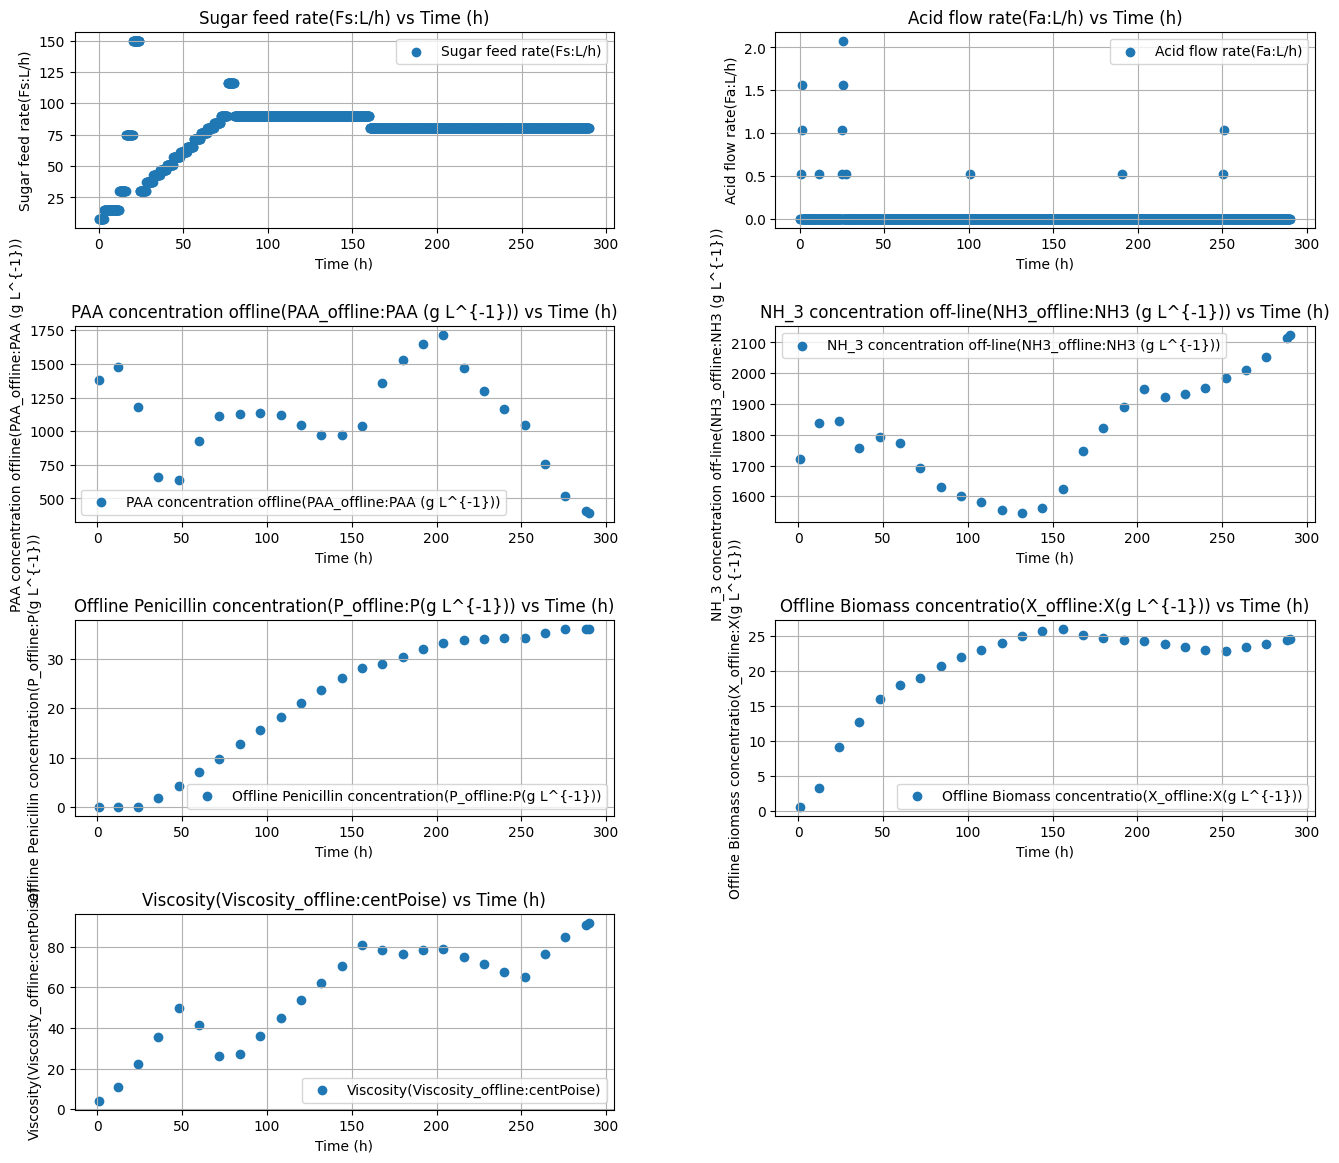

In [24]:
# Create a 5x5 grid of subplots with improved spacing
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each variable in batch_29_df
for i, var in enumerate(mid_categories):
    # Create subplots
    ax = axes[i]

    # Plot the continuous variable
    ax.scatter(batch_29_df['Time (h)'], batch_29_df[var], label=var)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel(var)
    ax.set_title(f'{var} vs Time (h)')
    ax.grid(True)
    ax.legend()

# Hide any remaining empty subplots
for i in range(len(mid_categories), len(axes)):
    axes[i].axis('off')

plt.show()

<span style = "color:blue">**Observation**</span>

1. **Sugar feed rate(Fs:L/h):** The sugar feed rate increased from 15 L/h to 80 L/h in the initial hours and remained relatively constant between 80 L/h and 90 L/h for most of the batch. 

2. **Acid flow rate(Fa:L/h):** The acid flow rate is predominantly 0 L/h for most of the batch (1437 out of 1450 observations). However, there are some instances of higher values (e.g., 2.07920 L/h), but they are rare.

3. **PAA concentration offline(PAA_offline:PAA (g L^{-1})):** PAA concentration offline varies across the batch, with some fluctuations. The values range from around 393.10 g/L to 1717.30 g/L. These variations may correspond to different stages of the batch process.

4. **NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})):** NH_3 concentration offline also fluctuates during the batch, with values ranging from 1546.5 g/L to 2125.5 g/L. These variations may indicate different phases of the batch process.

5. **Offline Penicillin concentration(P_offline:P(g L^{-1})):** The offline penicillin concentration varies during the batch, with values ranging from 0.000915 g/L to 36.180 g/L. These variations could be associated with different stages of penicillin production.

6. **Offline Biomass concentration(X_offline:X(g L^{-1})):** The offline biomass concentration varies throughout the batch, with values ranging from 0.56066 g/L to 26.108 g/L. These fluctuations may correspond to the growth and decline of biomass during the batch.

7. **Viscosity(Viscosity_offline:centPoise):** Viscosity values exhibit variability, ranging from 4.0847 centPoise to 91.9620 centPoise. These fluctuations may relate to changes in the consistency or thickness of the medium during the batch process.


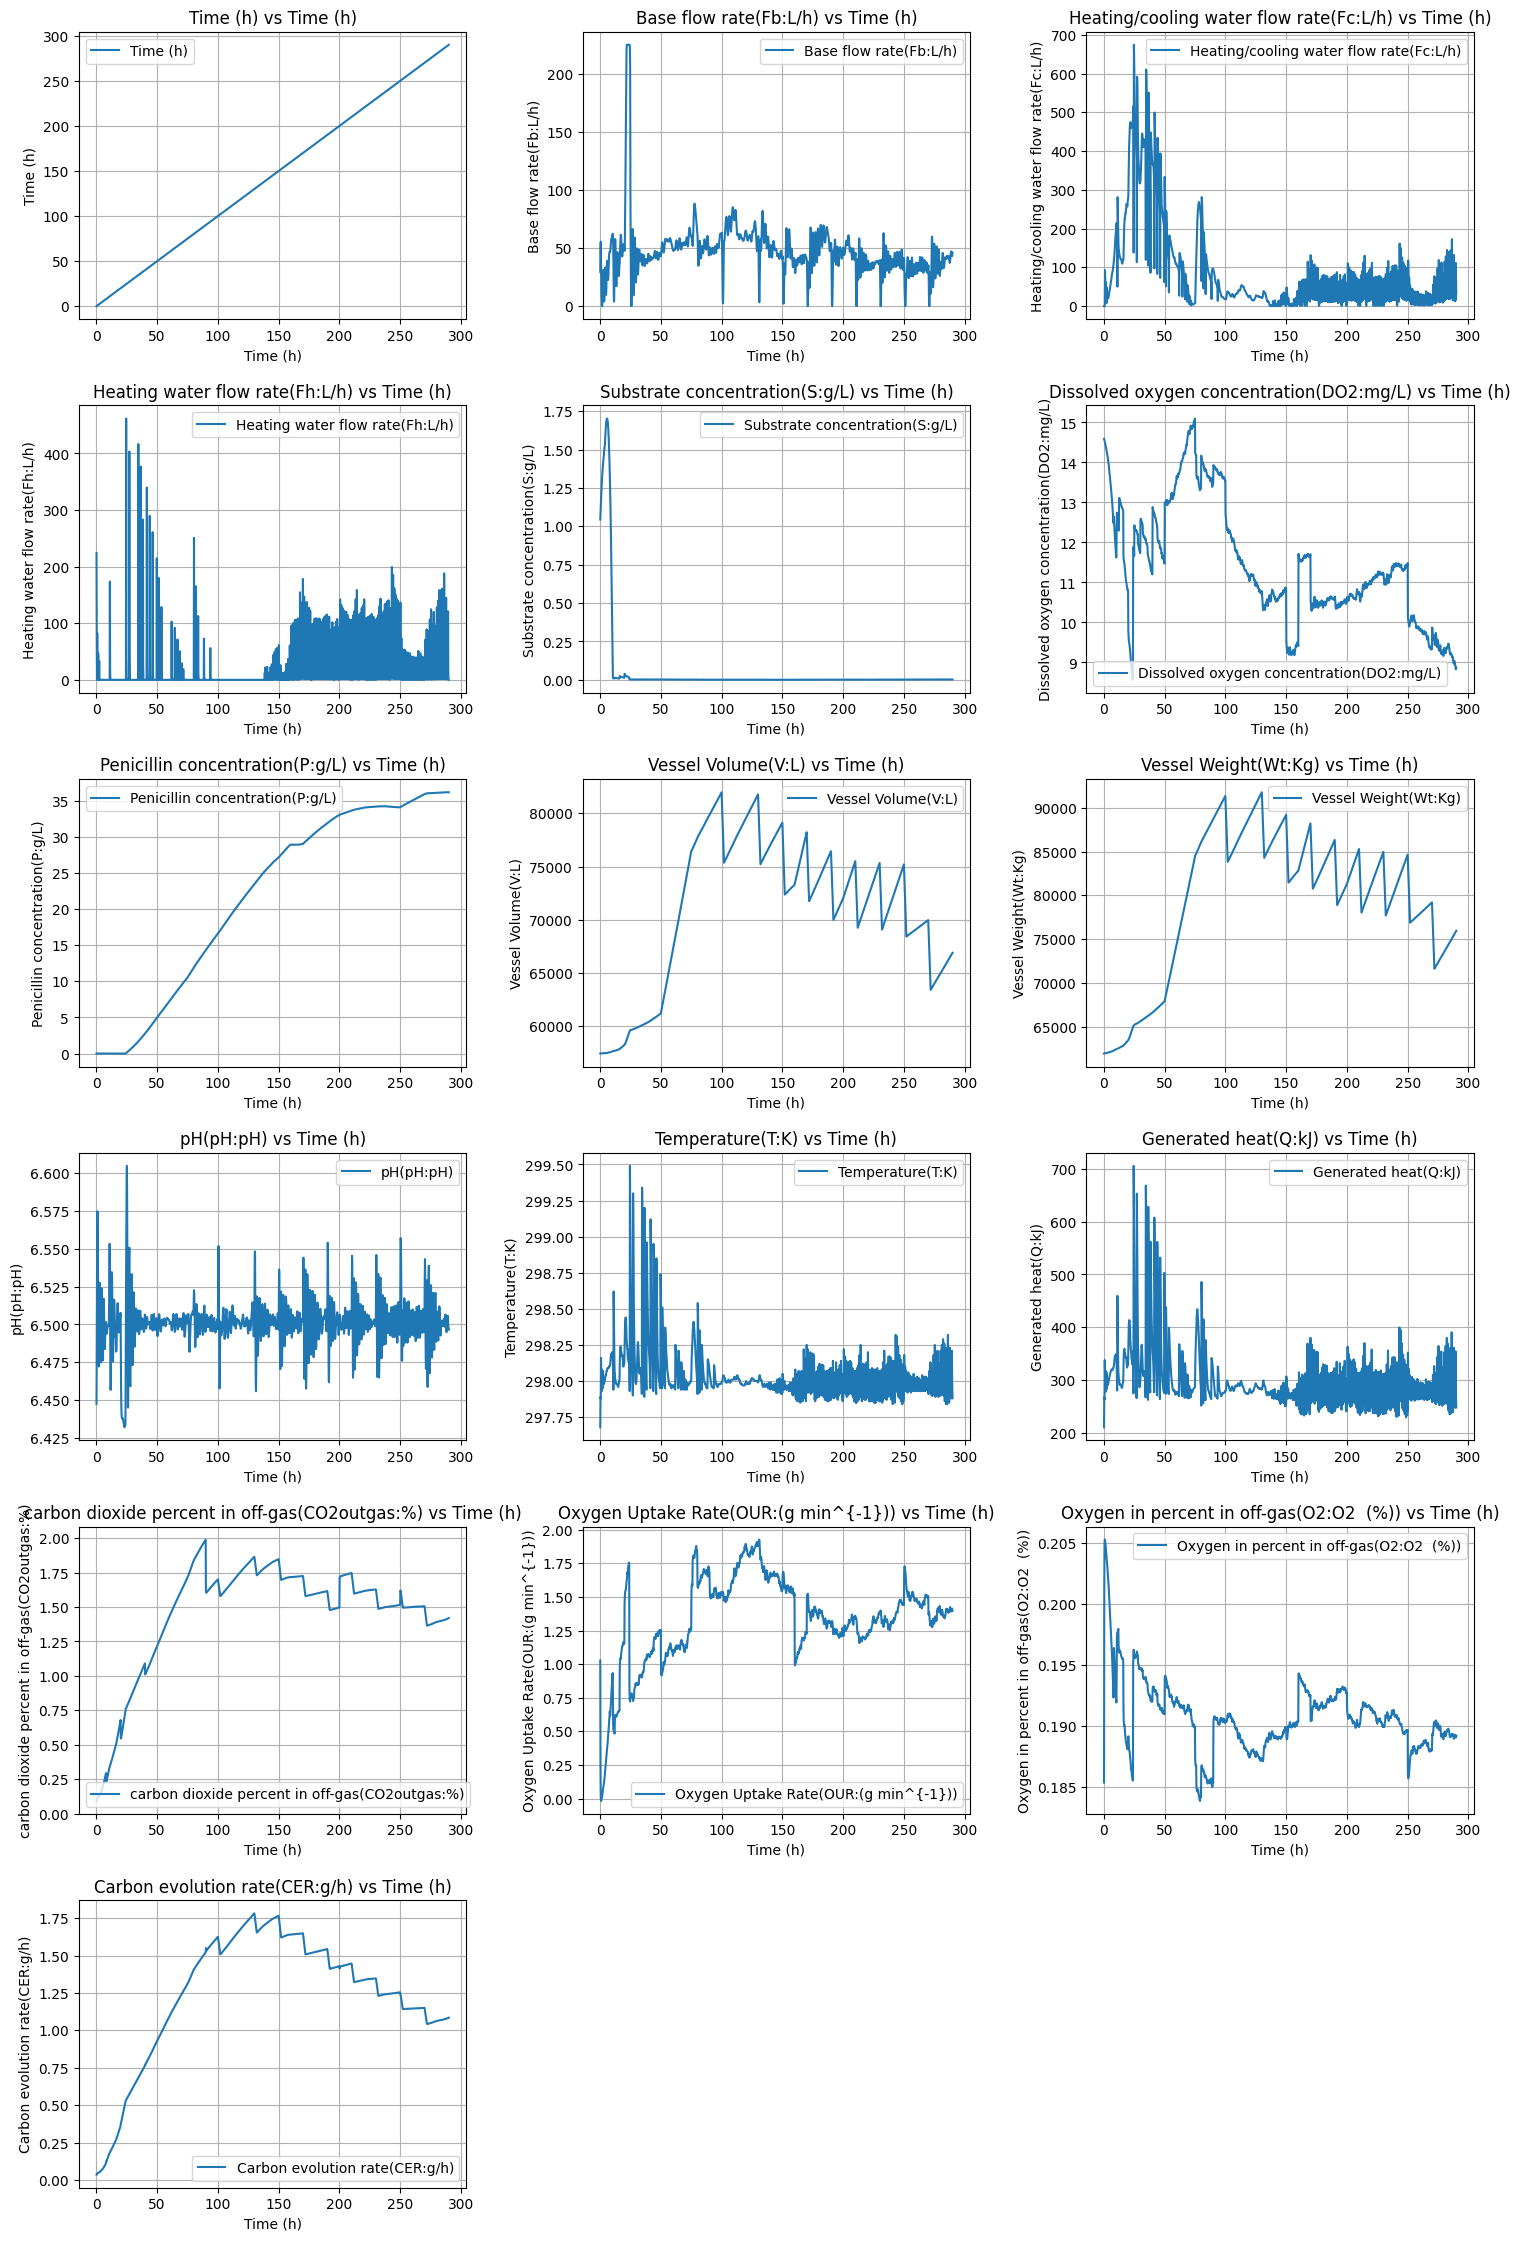

In [26]:
# Create a 5x5 grid of subplots with improved spacing
fig, axes = plt.subplots(6, 3, figsize=(18, 28))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each variable in batch_29_df
for i, var in enumerate(continous_features):
    # Create subplots
    ax = axes[i]

    # Plot the continuous variable
    ax.plot(batch_29_df['Time (h)'], batch_29_df[var], label=var)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel(var)
    ax.set_title(f'{var} vs Time (h)')
    ax.grid(True)
    ax.legend()

# Hide any remaining empty subplots
for i in range(len(continous_features), len(axes)):
    axes[i].axis('off')

plt.show()

<span style = "color:blue">**Observation**</span>

1. **Time (h)**: The time values are given in hours and range from 0.2 hours to 290 hours. It appears to be a continuous variable representing elapsed in hours.

2. **Base Flow Rate (Fb: L/h)**: The base flow rate values range from approximately 29.5 L/h to 55.43 L/h. likely related to the system's base requirement of batch and it varies within a specific range.

3. **Heating/Cooling Water Flow Rate (Fc: L/h)**: The heating/cooling water flow rate varies significantly, ranging from very small values (close to 0) to over 111 L/h. This variable appears to represent the flow rate of heating or cooling water in liters per hour.

4. **Heating Water Flow Rate (Fh: L/h)**: The heating water flow rate shows a wide range of values, from very small values to over 460 L/h. The values also seem to be logarithmically distributed, with many small values and a few larger values. This variable appears to represent the flow rate of heating water in liters per hour.

5. **Substrate concentration (S:g/L):** The substrate concentration decreases as the batch progresses, indicating that the consumption of the substrate for growth and metabolite production.

6. **Dissolved oxygen concentration (DO2:mg/L):** The dissolved oxygen concentration shows minor fluctuations, which might be due to variations in microbial activity and oxygen demand. Toward the end of the batch, there's a significant drop in oxygen concentration, suggesting increased microbial activity.

7. **Penicillin concentration (P:g/L):** Penicillin concentration increases as the batch progresses, which could be a result of microbial production. This concentration keeps rising until the end of the batch.

4. **Vessel Volume (V:L):** The vessel volume remains relatively constant, indicating that there's no significant addition or removal the bioreactor.

5. **Vessel Weight (Wt:Kg):** The vessel weight increases during the batch, which might be due to the growth and accumulation of microbial biomass and other components in the bioreactor.

6. **pH (pH:pH):** The pH fluctuates but generally remains within a narrow range. This suggests that the pH is being well-controlled during the fermentation process.

7. **Temperature (T:K):** The temperature is maintained within a relatively narrow range, ensuring a stable environment for microbial growth and product formation.

8. **Generated heat (Q:kJ):** The generated heat increases, likely due to microbial metabolic activity producing heat. This is consistent with the increase in penicillin concentration.

9. **Carbon dioxide percent in off-gas (CO2outgas:%):** The percentage of carbon dioxide in the off-gas increases over time, indicating higher metabolic activity as the batch progresses.

10. **Oxygen Uptake Rate (OUR: (g min^{-1})):** The oxygen uptake rate varies, suggesting changing microbial activity levels. It shows an increasing trend toward the end of the batch.

11. **Oxygen in percent in off-gas (O2: O2 (%)):** The percentage of oxygen in the off-gas gradually decreases as the batch progresses, indicating that more oxygen is being consumed by the microbial culture.

12. **Carbon evolution rate (CER: g/h):** The carbon evolution rate shows a steady increase over the course of the batch, indicating increasing metabolic activity and carbon dioxide production.

## Correlation:

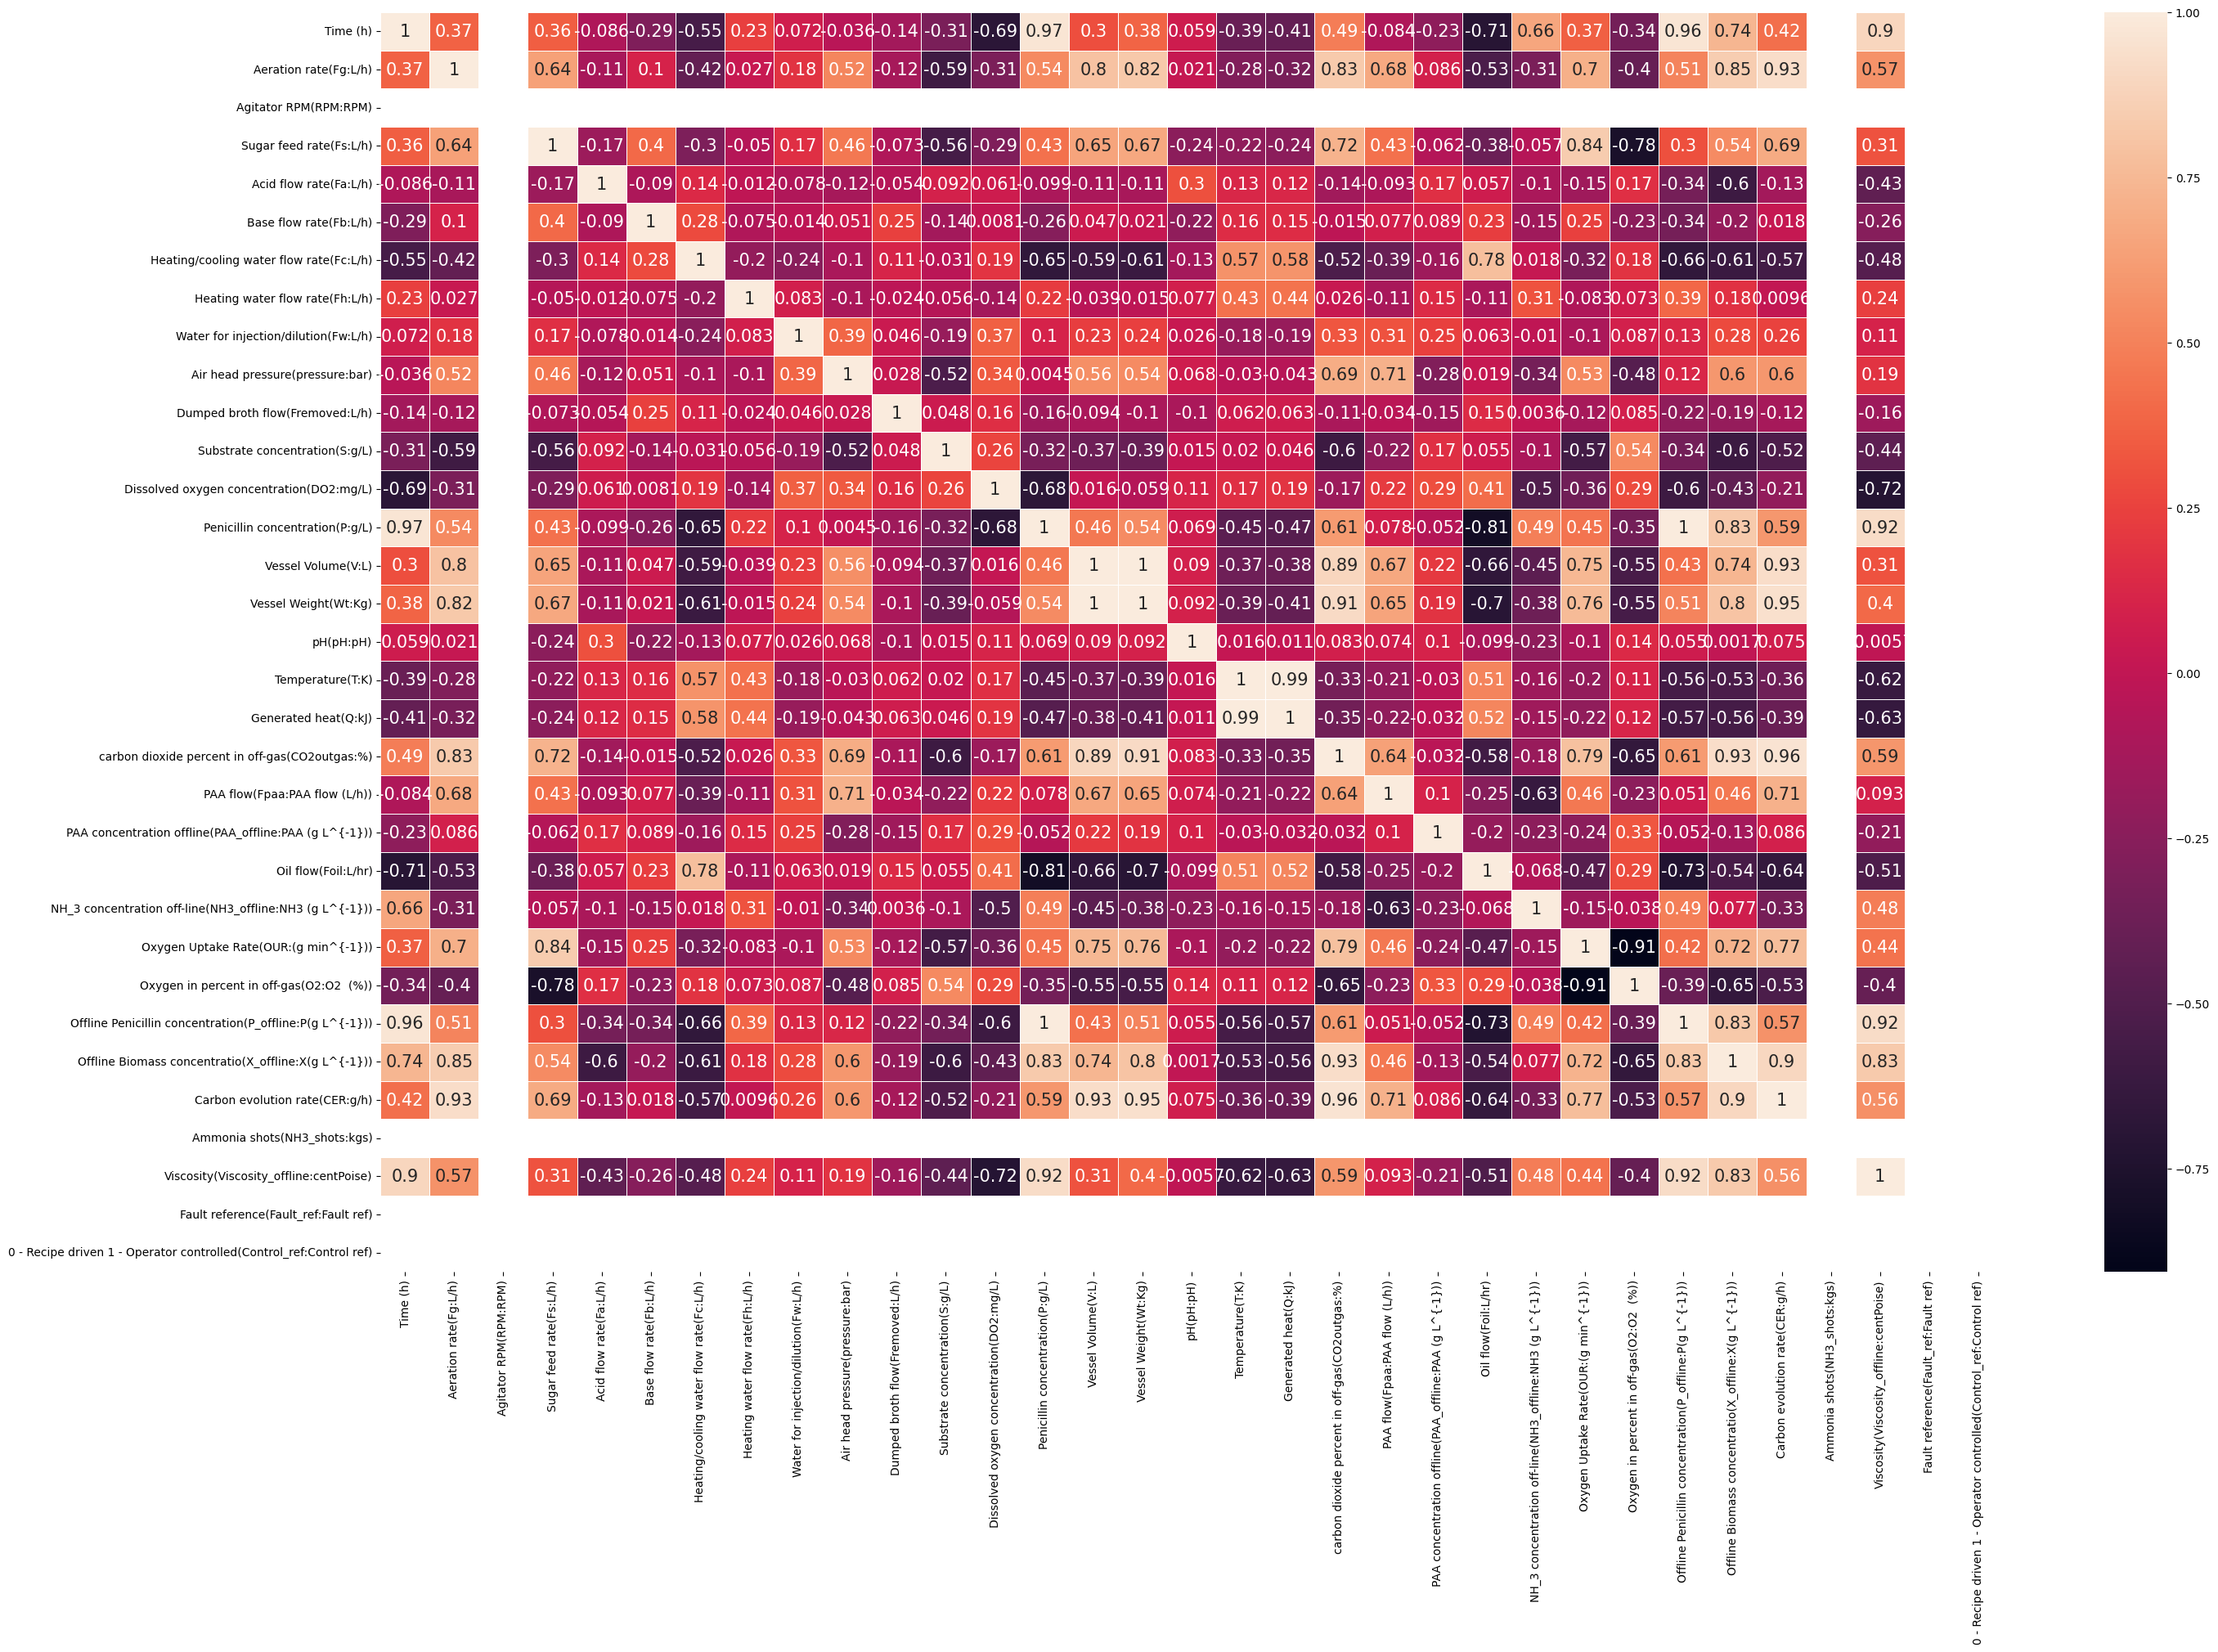

In [27]:
# The correlation matrix measures the linear relationship between pairs of variables in the DataFrame.
fig, ax = plt.subplots(figsize=(32, 20))

# drawing the plot with grid lines
sns.heatmap(data=batch_29_df.corr(), annot=True, annot_kws={"size": 15}, linewidths=0.5, linecolor="white")
plt.show()


In [28]:
# correlation coefficients between the "Penicillin concentration(P:g/L)" variable and other variables
print(batch_29_df.corr()['Penicillin concentration(P:g/L)'].abs().sort_values(ascending=False))

Penicillin concentration(P:g/L)                                       1.000000
Offline Penicillin concentration(P_offline:P(g L^{-1}))               0.999984
Time (h)                                                              0.966643
Viscosity(Viscosity_offline:centPoise)                                0.921357
Offline Biomass concentratio(X_offline:X(g L^{-1}))                   0.829267
Oil flow(Foil:L/hr)                                                   0.810573
Dissolved oxygen concentration(DO2:mg/L)                              0.678507
Heating/cooling water flow rate(Fc:L/h)                               0.653659
carbon dioxide percent in off-gas(CO2outgas:%)                        0.607241
Carbon evolution rate(CER:g/h)                                        0.590637
Vessel Weight(Wt:Kg)                                                  0.539543
Aeration rate(Fg:L/h)                                                 0.536707
NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1

<span style="color: blue;">**Observation:**</span>

The correlation coefficients between "Penicillin concentration (P:g/L)" and other variables reveal the strength and direction of the linear relationship between these variables.

1. *Strong Positive Correlations:*
   - "Penicillin concentration (P:g/L)" has a strong positive correlation with "Offline Penicillin concentration (P_offline:P(g L^{-1}))" (correlation coefficient = 0.999984). This indicates a nearly perfect linear relationship between these two variables, which is expected since they represent the same parameter.
   - "Penicillin concentration (P:g/L)" also has a strong positive correlation with "Time (h)" (correlation coefficient = 0.966643). As time increases, the penicillin concentration tends to increase.
   

2. *Positive Correlations:*
   - "Penicillin concentration (P:g/L)" has positive correlations with variables like "Viscosity (Viscosity_offline:centPoise)," "Oil flow (Foil:L/hr)," "Dissolved oxygen concentration (DO2:mg/L)," and "Heating/cooling water flow rate (Fc:L/h)." These variables have a moderate to strong positive relationship with penicillin concentration.
   

3. *Negative Correlations:*
   - There are no strong negative correlations with penicillin concentration, indicating that most variables tend to move in a positive or neutral direction concerning penicillin concentration.
   

4. *Weak Correlations:*
   - Some variables, like "Air head pressure (pressure:bar)," "Agitator RPM (RPM:RPM)," "Ammonia shots (NH3_shots:kgs)," "Fault reference (Fault_ref:Fault ref)," and "0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref)," have no significant linear relationship with penicillin concentration (correlation coefficient = NaN).


5. *The direction of correlation:*
   - A positive correlation suggests that as the value of the other variable increases, the penicillin concentration also tends to increase.
   - The strong correlation between "Penicillin concentration (P:g/L)" and "Offline Penicillin concentration (P_offline:P(g L^{-1}))" is due to their near-identical nature, as one likely serves as a validation or reference for the other.


<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">Summary</span></p>
</div>


The analysis of the industrial-scale penicillin fermentation dataset reveals several key insights. The dataset, which includes multiple variables, reflects the complex nature of the fermentation process. Here's a precise summary of the findings:

- The dataset contains various variables that capture the dynamics of the fermentation process, with some variables remaining constant and others showing fluctuations.

- The analysis identified strong positive correlations between Penicillin concentration and Offline Penicillin concentration, indicating their close relationship.

- Positive correlations were observed between Penicillin concentration and variables related to viscosity, oil flow, dissolved oxygen concentration, and heating/cooling water flow rate, suggesting their influence on penicillin production.

- No significant negative correlations were found, implying that most variables tend to move in a positive or neutral direction concerning penicillin concentration.



<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 32px; font-weight: bold; color: red;">Conclusion</span></p>
</div>


The analysis provides valuable insights into the industrial-scale penicillin fermentation process. The data highlights the dynamic nature of the production process, with specific variables showing variability. The strong positive correlation between Penicillin concentration and Offline Penicillin concentration underscores their similarity and significance in monitoring penicillin production.

The positive correlations between Penicillin concentration and certain variables suggest their roles in influencing penicillin production. Understanding these relationships is vital for optimizing large-scale fermentations and improving product quality.

The observed trends in penicillin concentration over time indicate distinct phases in the production process, which warrant further investigation.

Overall, these findings offer a foundation for more in-depth research and optimization efforts to enhance the efficiency and yield of industrial-scale penicillin fermentation processes.

<div style="border: 1px solid red; padding: 2px; margin: 2px auto;">
  <p style="text-align: center;"><span style="font-size: 30px; font-weight: bold; color: red;">Thank you for taking the time</span></p>
</div>
